In [145]:
import itertools
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pivottablejs import pivot_ui

In [146]:
df = pd.read_csv("Train.csv")

In [147]:
df.head()

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target
0,ID_266671248032267278,266671,Kenya,248032,267278,Type_1,8448.0,8448.0,2022-08-30,2022-09-06,7,Repeat Loan,120.85,0.014305,121.0,0
1,ID_248919228515267278,248919,Kenya,228515,267278,Type_1,25895.0,25979.0,2022-07-30,2022-08-06,7,Repeat Loan,7768.50,0.300000,7794.0,0
2,ID_308486370501251804,308486,Kenya,370501,251804,Type_7,6900.0,7142.0,2024-09-06,2024-09-13,7,Repeat Loan,1380.00,0.200000,1428.0,0
3,ID_266004285009267278,266004,Kenya,285009,267278,Type_1,8958.0,9233.0,2022-10-20,2022-10-27,7,Repeat Loan,2687.40,0.300000,2770.0,0
4,ID_253803305312267278,253803,Kenya,305312,267278,Type_1,4564.0,4728.0,2022-11-28,2022-12-05,7,Repeat Loan,1369.20,0.300000,1418.0,0


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68654 entries, 0 to 68653
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           68654 non-null  object 
 1   customer_id                  68654 non-null  int64  
 2   country_id                   68654 non-null  object 
 3   tbl_loan_id                  68654 non-null  int64  
 4   lender_id                    68654 non-null  int64  
 5   loan_type                    68654 non-null  object 
 6   Total_Amount                 68654 non-null  float64
 7   Total_Amount_to_Repay        68654 non-null  float64
 8   disbursement_date            68654 non-null  object 
 9   due_date                     68654 non-null  object 
 10  duration                     68654 non-null  int64  
 11  New_versus_Repeat            68654 non-null  object 
 12  Amount_Funded_By_Lender      68654 non-null  float64
 13  Lender_portion_F

In [149]:
df = df.drop_duplicates()

In [150]:
df["disbursement_date"] = pd.to_datetime(df["disbursement_date"])
df["due_date"] = pd.to_datetime(df["due_date"])

In [151]:
df["disbursement_date__year"] = df["disbursement_date"].dt.year
df["disbursement_date__month"] = df["disbursement_date"].dt.month
# df["disbursement_date__half_month"] = df["disbursement_date"].dt.day // 8 + 1

df["due_date__year"] = df["due_date"].dt.year
df["due_date__month"] = df["due_date"].dt.month
# df["due_date__half_month"] = df["due_date"].dt.day // 8 + 1

In [152]:
numerical_columns = [
    "Total_Amount",
    "Total_Amount_to_Repay",
    "duration",
    "Amount_Funded_By_Lender",
    "Lender_portion_Funded",
    "Lender_portion_to_be_repaid",
]

categorical_columns = [
    # "ID", # Commented out due to high cardinality
    # "customer_id", # Commented out due to high cardinality
    # "country_id", # Commented out since Kenya is the only value hence not needed
    # "tbl_loan_id", # Commented out due to high cardinality
    "lender_id",
    "loan_type",
    "New_versus_Repeat",
    "disbursement_date__year",
    "disbursement_date__month",
    # "disbursement_date__half_month",
    "due_date__year",
    "due_date__month",
    # "due_date__half_month",
]

date_columns = ["disbursement_date", "due_date"]

target_column = "target"

No null values

In [153]:
desc = df[numerical_columns].describe()

desc.loc["median"] = df[numerical_columns].median()

desc.loc["mode"] = df[numerical_columns].mode().iloc[0]

desc = desc.map(lambda x: "{:,.5f}".format(x))

In [154]:
desc.loc[["min", "25%", "50%", "75%", "max"]]

,Total_Amount,Total_Amount_to_Repay,duration,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid
min,2.00000,0.00000,1.00000,0.00000,0.00000,0.00000
25%,"2,295.00000","2,329.00000",7.00000,234.00000,0.11871,239.00000
50%,"5,249.00000","5,325.00000",7.00000,915.00000,0.30000,934.00000
75%,"11,450.00000","11,650.00000",7.00000,"2,272.65000",0.30000,"2,317.00000"
max,"23,000,000.00000","25,415,000.00000","1,096.00000","1,600,000.00000",1.16812,"1,821,338.00000"


In [155]:
desc.loc[["mean", "median", "mode", "std"]]

,Total_Amount,Total_Amount_to_Repay,duration,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid
mean,"14,836.82862","15,639.92990",8.54459,"2,545.66320",0.21868,"2,652.62149"
median,"5,249.00000","5,325.00000",7.00000,915.00000,0.30000,934.00000
mode,"1,500.00000","5,176.00000",7.00000,0.00000,0.30000,0.00000
std,"141,649.86839","165,078.35283",13.34314,"11,922.72417",0.12983,"13,380.06354"


In [157]:
df[target_column].value_counts(normalize=True).round(2)

target
0    0.98
1    0.02
Name: proportion, dtype: float64

Target classes are imbalanced

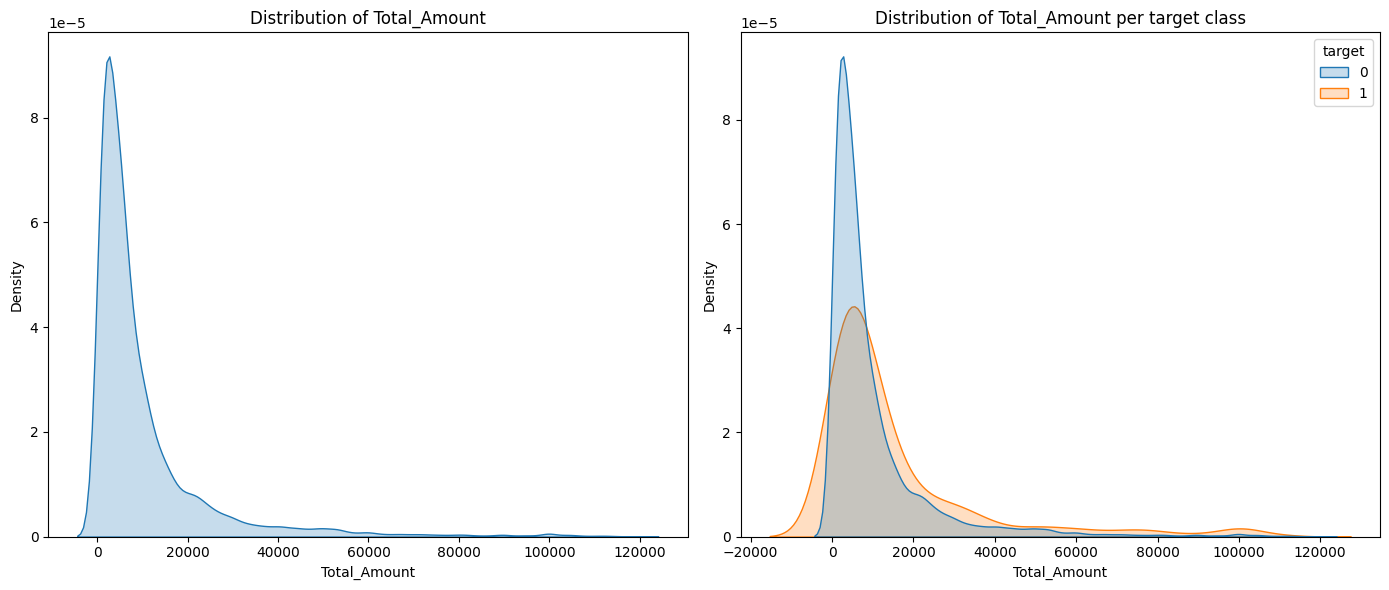

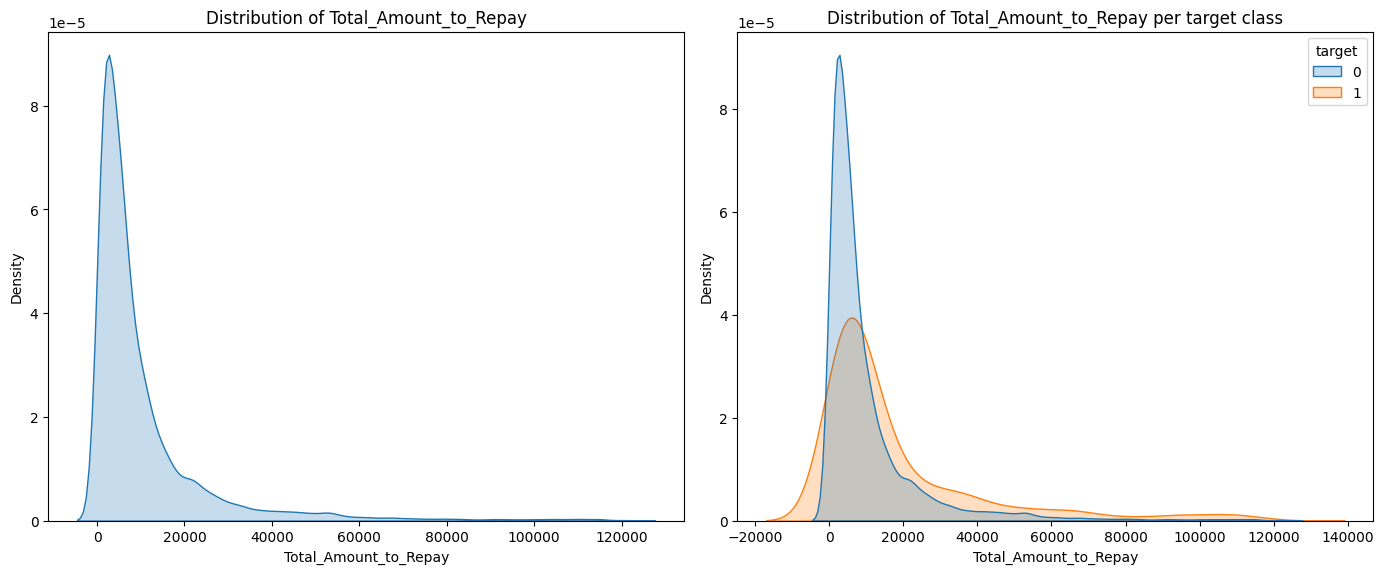

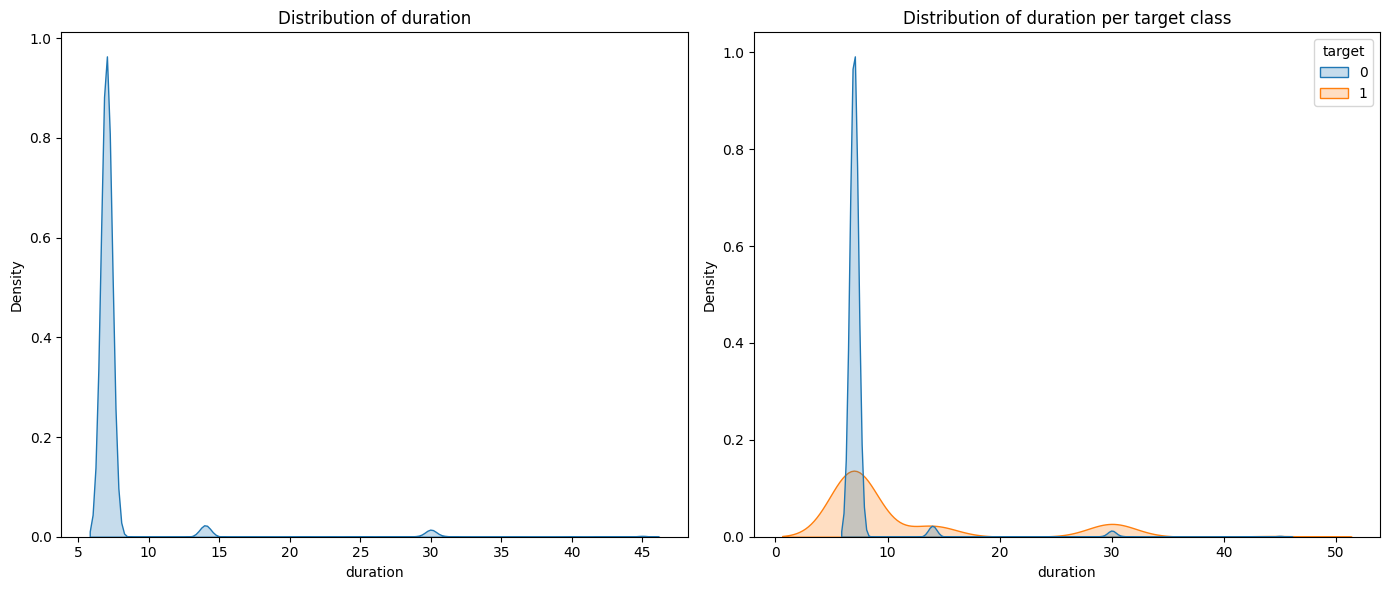

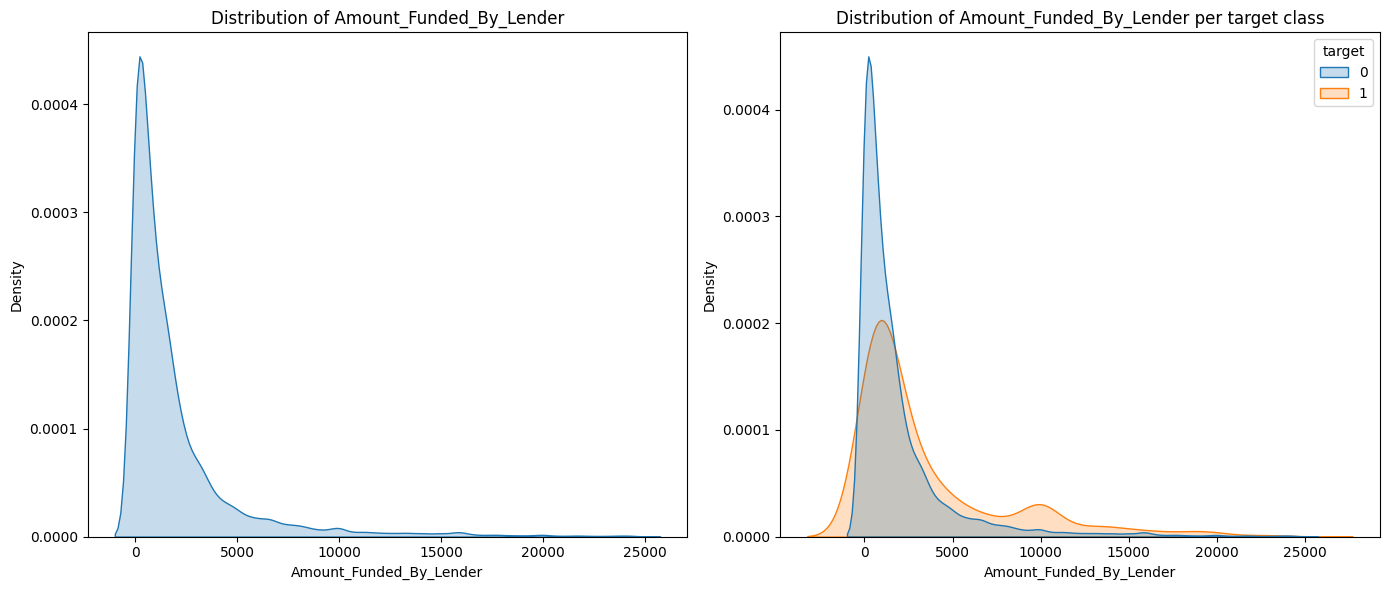

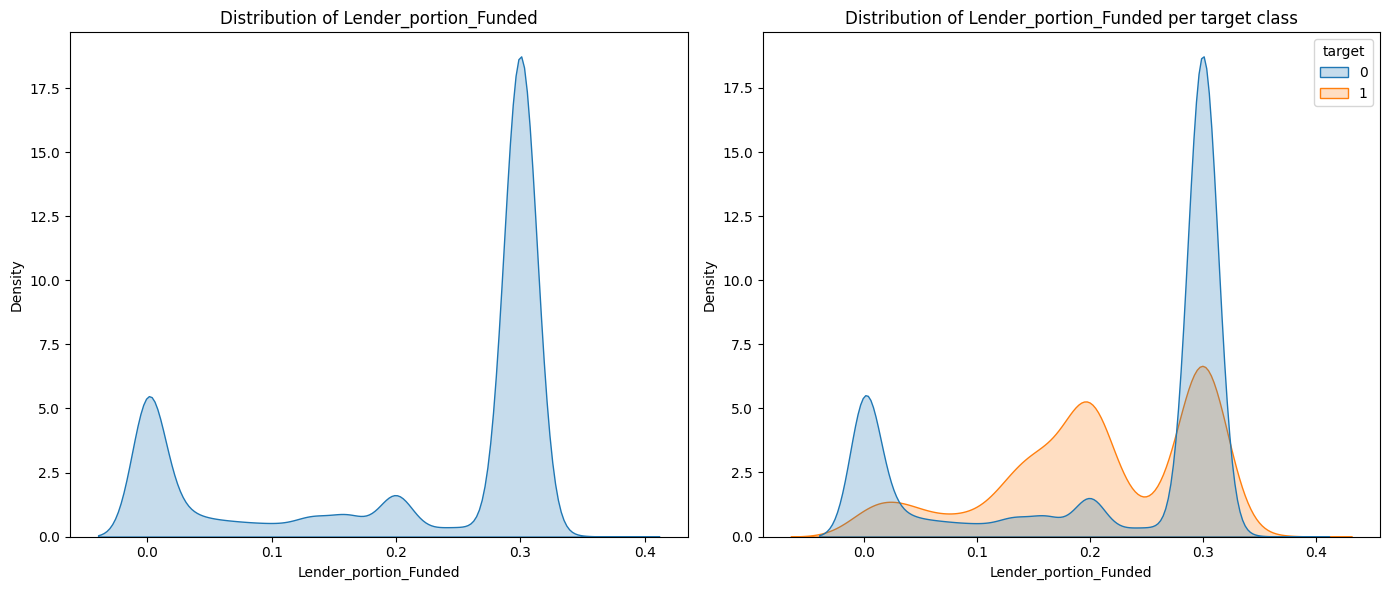

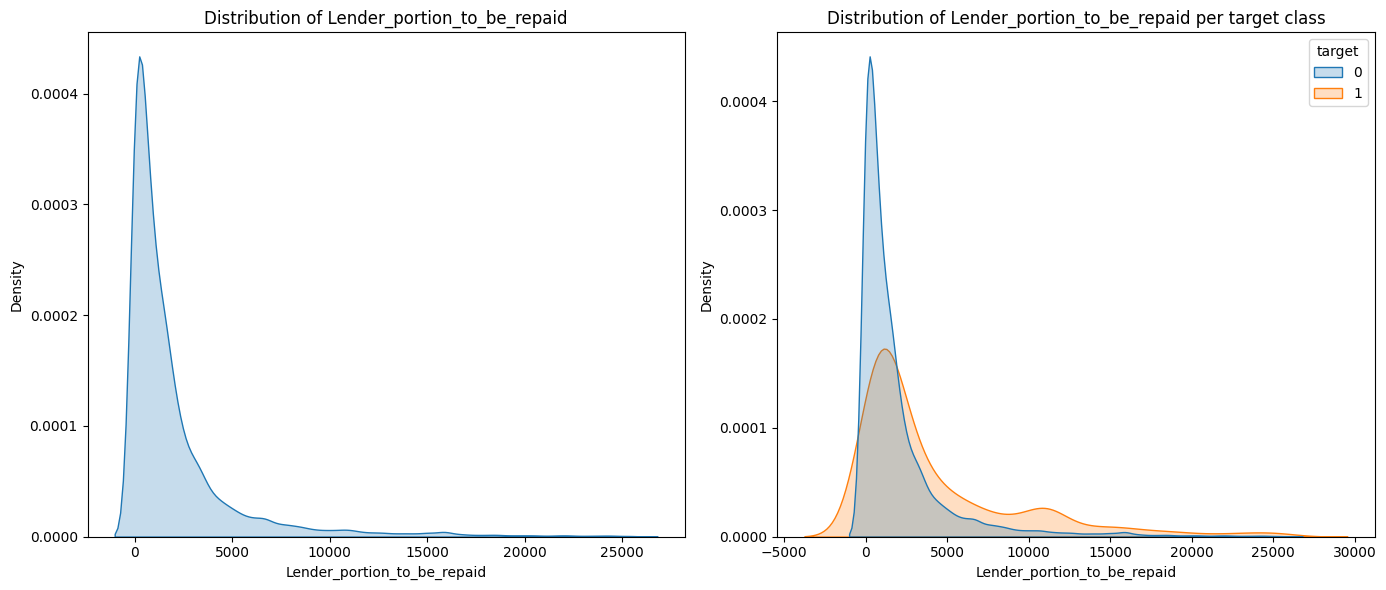

In [158]:
for column in numerical_columns:
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    q1 = df[column].quantile(0.01)
    q3 = df[column].quantile(0.99)

    filtered_df = df[(df[column] >= q1) & (df[column] <= q3)]

    sns.kdeplot(data=filtered_df, x=column, ax=axes[0], fill=True)
    
    axes[0].set_title(f"Distribution of {column}")

    sns.kdeplot(
        data=filtered_df,
        x=column,
        hue=target_column,
        ax=axes[1],
        common_norm=False,
        fill=True,
    )
    axes[1].set_title(f"Distribution of {column} per target class")

    plt.tight_layout()
    plt.show()

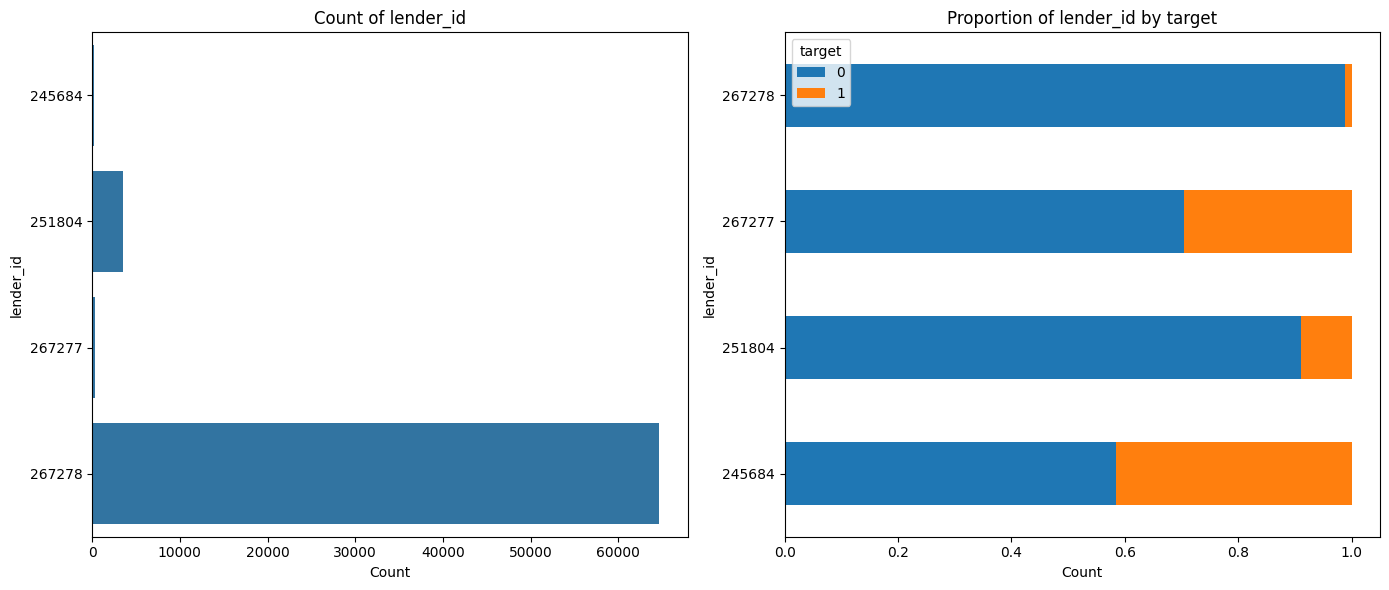

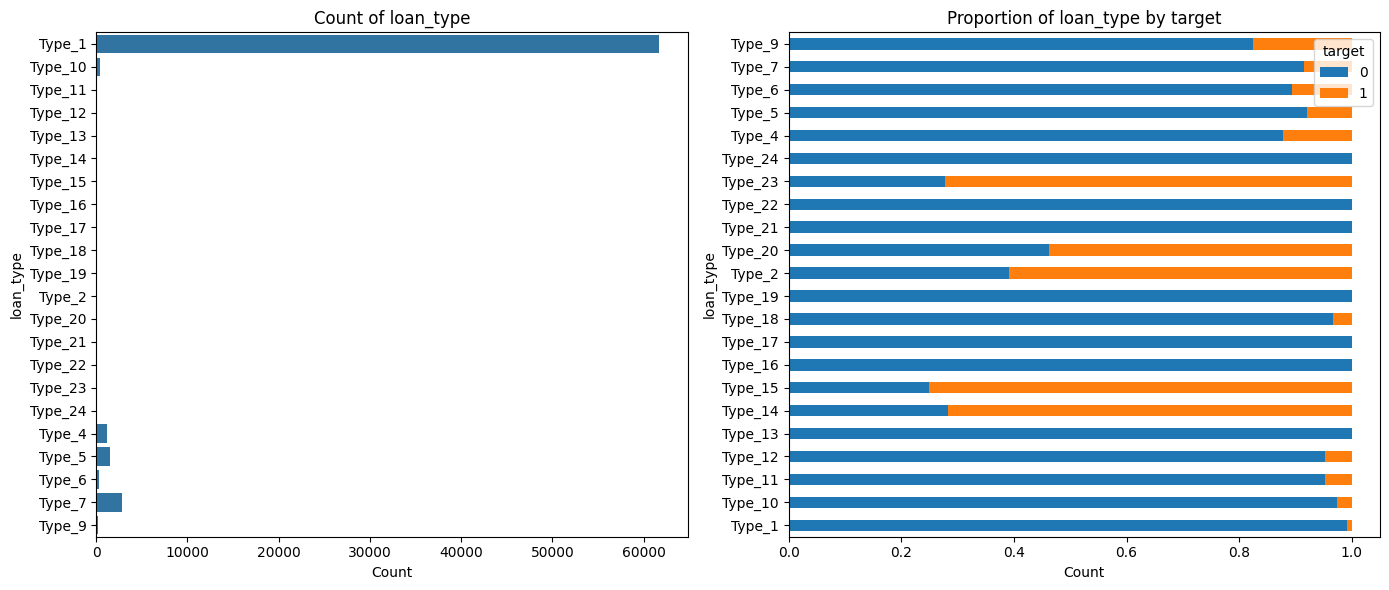

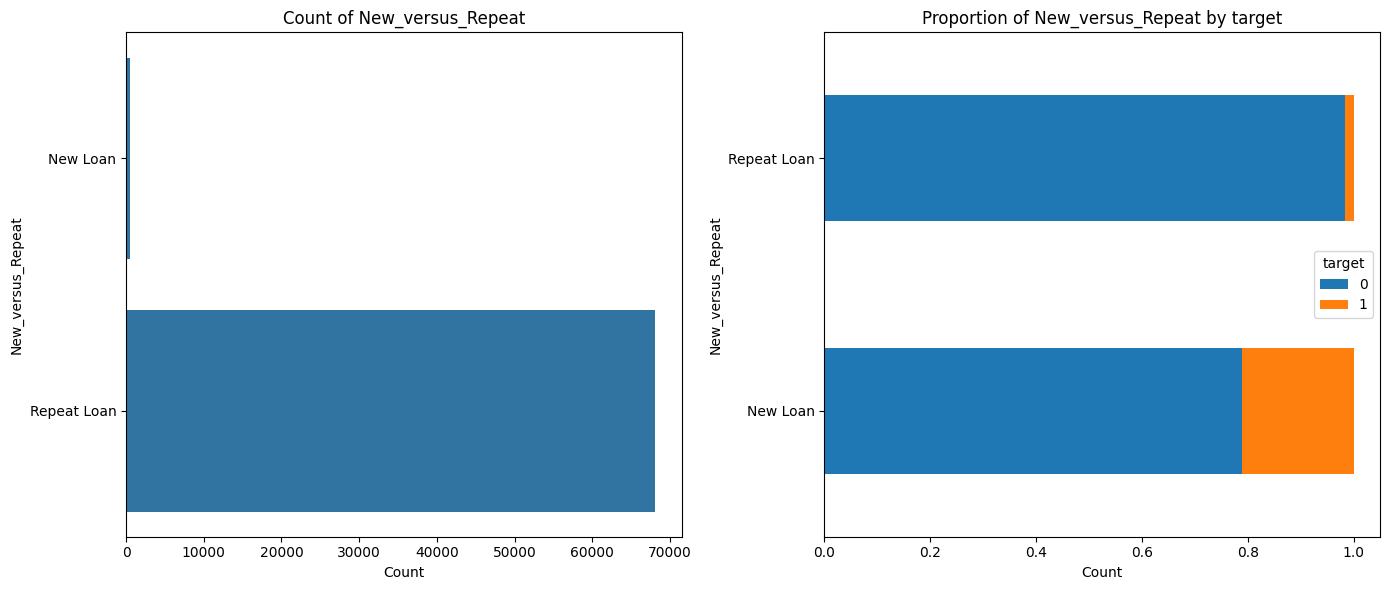

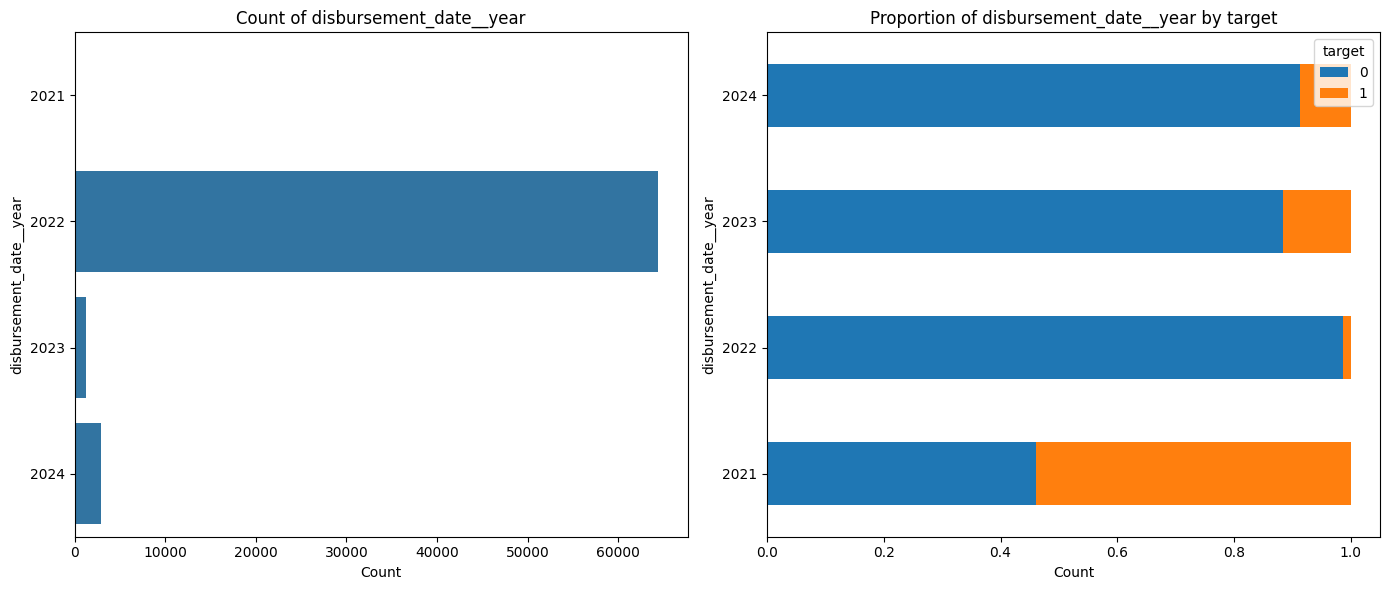

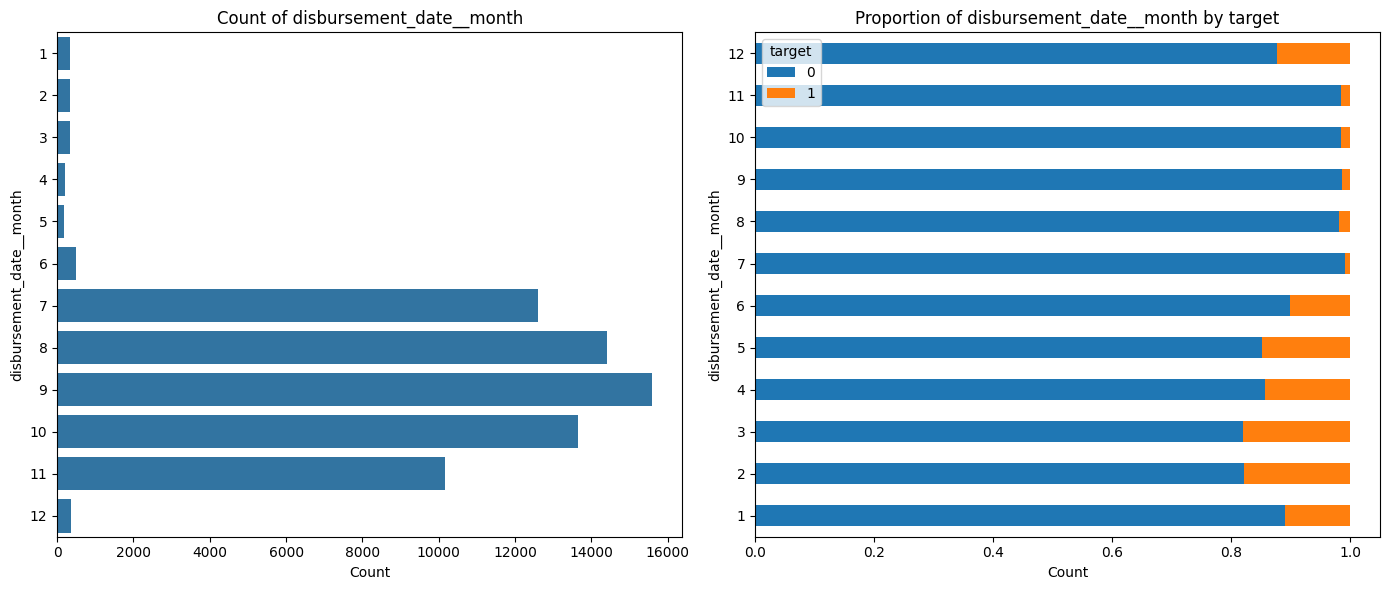

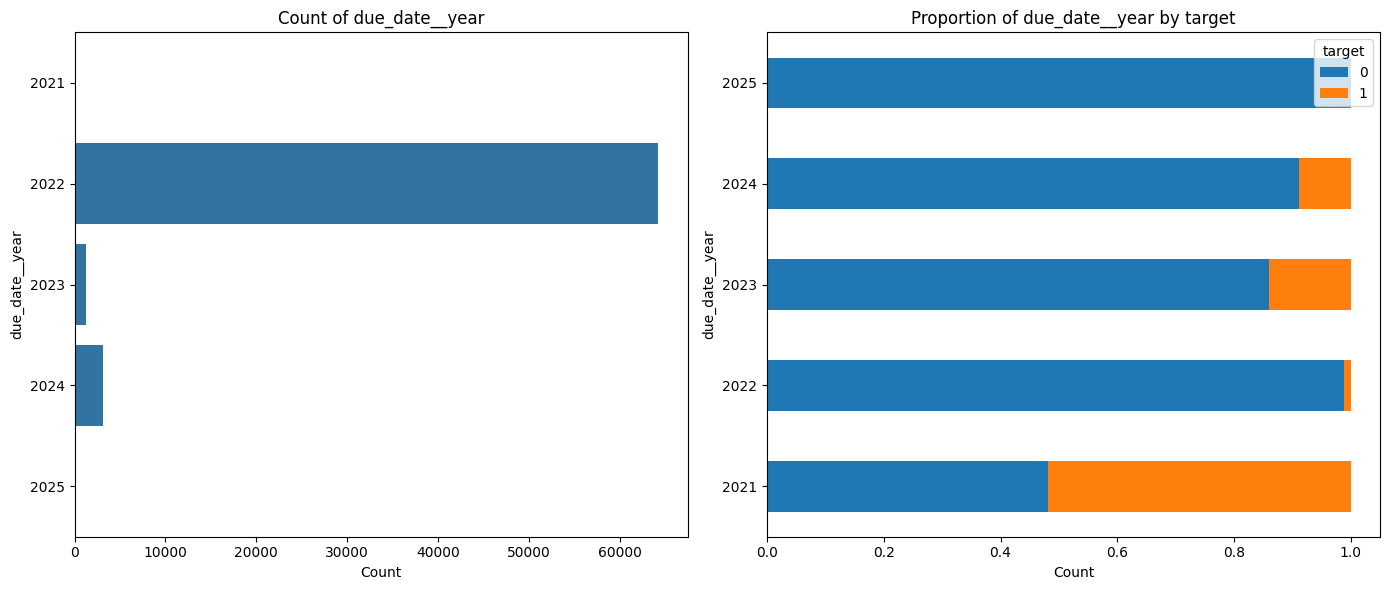

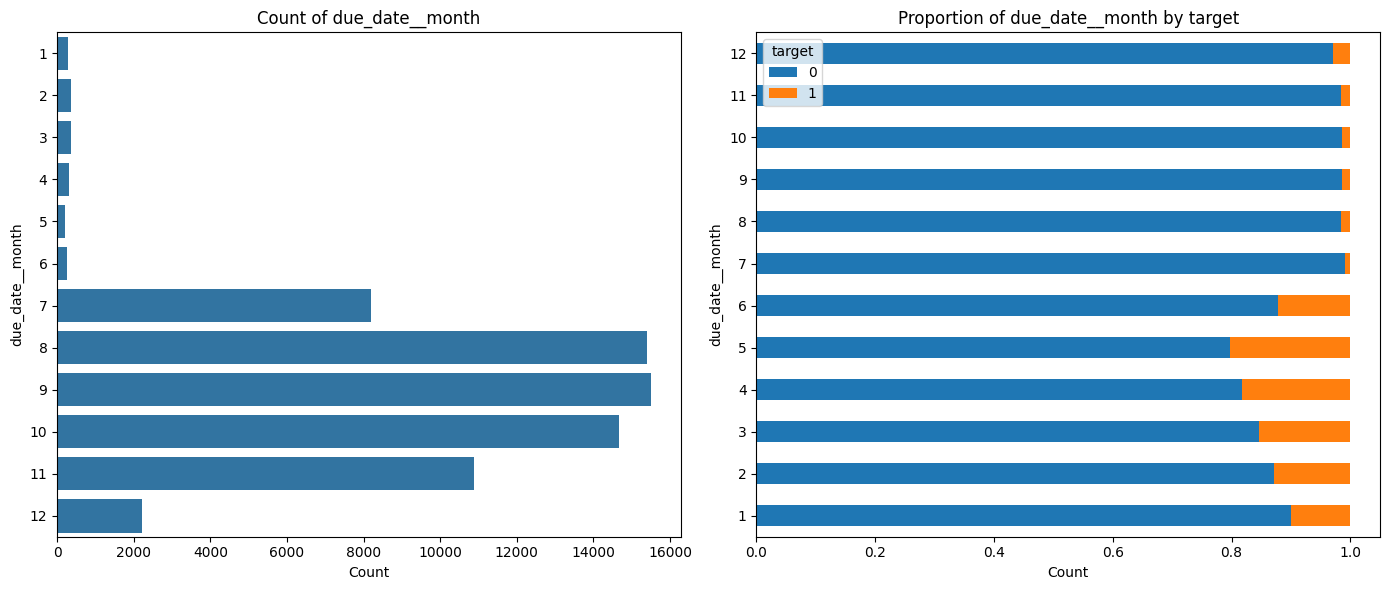

In [159]:
for column in categorical_columns:
    df__categorical_count = df.groupby(column).size().reset_index(name="count")

    df__categorical_count_per_target = pd.crosstab(
        df[column], df[target_column], normalize="index"
    )

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    sns.barplot(data=df__categorical_count, y=column, x="count", ax=axes[0], orient="h")
    axes[0].set_title(f"Count of {column}")
    axes[0].set_xlabel("Count")
    axes[0].set_ylabel(column)

    df__categorical_count_per_target.plot(kind="barh", stacked=True, ax=axes[1])

    axes[1].set_title(f"Proportion of {column} by {target_column}")
    axes[1].set_xlabel("Count")
    axes[1].set_ylabel(column)

    plt.tight_layout()

    # Show the plots
    plt.show()

In [162]:
# categorical_column_combinations = list(itertools.combinations(categorical_columns, 2))


# for combo in categorical_column_combinations:
#     col1, col2 = combo

#     crosstab = pd.crosstab(
#         index=[df[col1], df[col2]], columns=df[target_column], normalize="index"
#     )

#     # crosstab = crosstab.reset_index()

#     crosstab.index = ["_".join(map(str, idx)) for idx in crosstab.index]

#     crosstab.plot(kind="barh", stacked=True)

#     plt.title(f"{col1} and {col2} by {target_column}")
#     plt.tight_layout()

#     # Show the plots
#     plt.show()

#     # print(crosstab)

In [ ]:
df__economic_indicators = pd.read_csv("economic_indicators.csv")

In [ ]:
df__economic_indicators

,Country,Indicator,YR2001,YR2002,YR2003,YR2004,YR2005,YR2006,YR2007,YR2008,...,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020,YR2021,YR2022,YR2023
0,Ghana,"Inflation, consumer prices (annual %)",41.509496,9.360932,29.772980,18.042739,15.438992,11.679184,10.734267,16.494640,...,15.489616,17.149970,17.454635,12.371922,7.808765,7.143640,9.887290,9.971089,31.255895,38.106966
1,Cote d'Ivoire,"Inflation, consumer prices (annual %)",4.361529,3.077265,3.296807,1.457988,3.885830,2.467191,1.892006,6.308528,...,0.448682,1.251500,0.723178,0.685881,0.359409,-1.106863,2.425007,4.091952,5.276167,4.387117
2,Kenya,"Inflation, consumer prices (annual %)",5.738598,1.961308,9.815691,11.624036,10.312778,14.453734,9.758880,26.239817,...,6.878155,6.582154,6.297250,8.005650,4.689806,5.239638,5.405162,6.107936,7.659863,7.671396
3,Ghana,"Official exchange rate (LCU per US$, period av...",0.716305,0.792417,0.866764,0.899495,0.905209,0.915107,0.932619,1.052275,...,2.896575,3.714642,3.909817,4.350533,4.585325,5.217367,5.595708,5.805700,8.272400,11.020408
4,Cote d'Ivoire,"Official exchange rate (LCU per US$, period av...",732.397693,693.713226,579.897426,527.338032,527.258363,522.425625,478.633718,446.000041,...,493.757330,591.211698,592.605615,580.656750,555.446458,585.911013,575.586005,554.530675,623.759701,606.569750
5,Kenya,"Official exchange rate (LCU per US$, period av...",78.563195,78.749142,75.935569,79.173876,75.554109,72.100835,67.317638,69.175320,...,87.922164,98.178453,101.504369,103.410005,101.301574,101.991298,106.450780,109.637747,117.865989,139.846384
6,Ghana,Real interest rate (%),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Cote d'Ivoire,Real interest rate (%),NaN,NaN,NaN,NaN,5.763991,3.331831,1.613290,-0.368944,...,0.891701,0.361233,6.552137,6.246748,NaN,NaN,NaN,NaN,NaN,NaN
8,Kenya,Real interest rate (%),17.812501,17.358141,9.770511,5.045258,7.609988,-8.009867,4.819091,-0.984997,...,8.249079,6.268806,10.118129,5.656748,8.487960,7.831101,6.714634,7.427581,5.968447,6.546517
9,Ghana,Average precipitation in depth (mm per year),1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,...,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,1187.000000,NaN,NaN


In [ ]:
df__economic_indicators_melted = df__economic_indicators.melt(
    id_vars=["Country", "Indicator"], var_name="YR", value_name="Value"
)

df__economic_indicators_melted["YR"] = df__economic_indicators_melted["YR"].str.replace(
    "YR", "", regex=False
)

df__economic_indicators_melted = df__economic_indicators_melted[
    (df__economic_indicators_melted["YR"] >= "2021")
    & (df__economic_indicators_melted["Country"] == "Kenya")
]

df__economic_indicators_melted
# countries = list(df__economic_indicators_melted["Country"].unique())
# indicators = list(df__economic_indicators_melted["Indicator"].unique())
# years = list(df__economic_indicators_melted["YR"].unique())


# for indicator in indicators:
#     sns.lineplot(
#         data=df__economic_indicators_melted[
#             (df__economic_indicators_melted["Country"] == "Kenya") &
#             (df__economic_indicators_melted["Indicator"] == indicator)
#         ],
#         x="YR",
#         y="Value",
#     )
#     plt.title(f"{indicator}")
#     plt.xticks(rotation=60)
#     plt.tight_layout()
#     plt.show()

,Country,Indicator,YR,Value
542,Kenya,"Inflation, consumer prices (annual %)",2021,6.107936
545,Kenya,"Official exchange rate (LCU per US$, period av...",2021,109.637747
548,Kenya,Real interest rate (%),2021,7.427581
551,Kenya,Average precipitation in depth (mm per year),2021,630.000000
554,Kenya,Deposit interest rate (%),2021,6.686974
557,Kenya,Lending interest rate (%),2021,12.079998
560,Kenya,Interest rate spread (lending rate minus depos...,2021,5.393025
563,Kenya,Fossil fuel energy consumption (% of total),2021,NaN
566,Kenya,Unemployment rate,2021,5.693000
569,Kenya,"Inflation, consumer prices (annual %)",2022,7.659863


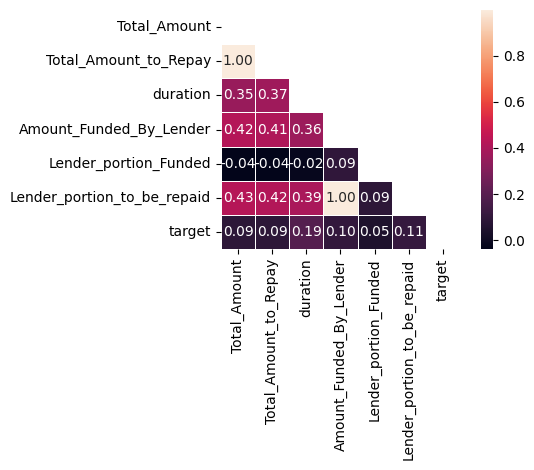

In [ ]:
# Generate a mask for the upper triangle
corr = df[[*numerical_columns, target_column]].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(corr, mask=mask, linewidths=0.5, square=True, fmt=".2f", annot=True)
plt.tight_layout()
plt.show()

In [ ]:
pivot_ui(df[[*numerical_columns, *categorical_columns, target_column]])

In [ ]:
# import pandas as pd


# def flatten_columns(df: pd.DataFrame, separator: str = '_') -> pd.DataFrame:
#     """
#     Flattens multi-level column headers in a DataFrame.

#     Parameters:
#         df (pd.DataFrame): The DataFrame with multi-level columns.
#         separator (str): The separator to join column levels (default is '_').

#     Returns:
#         pd.DataFrame: A DataFrame with flattened column headers.
#     """
#     df.columns = [
#         separator.join(col).strip() if isinstance(col, tuple) else col 
#         for col in df.columns
#     ]
#     return df
